<a href="https://colab.research.google.com/github/ashish-hacker/Nunam/blob/main/Visulaisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [102]:
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np

In [47]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [49]:
%tensorflow_version 2.x
import tensorflow as tf
import timeit

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print(
      '\n\nThis error most likely means that this notebook is not '
      'configured to use a GPU.  Change this in Notebook Settings via the '
      'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n')
  raise SystemError('GPU device not found')

def cpu():
  with tf.device('/cpu:0'):
    random_image_cpu = tf.random.normal((100, 100, 100, 3))
    net_cpu = tf.keras.layers.Conv2D(32, 7)(random_image_cpu)
    return tf.math.reduce_sum(net_cpu)

def gpu():
  with tf.device('/device:GPU:0'):
    random_image_gpu = tf.random.normal((100, 100, 100, 3))
    net_gpu = tf.keras.layers.Conv2D(32, 7)(random_image_gpu)
    return tf.math.reduce_sum(net_gpu)
  
# We run each op once to warm up; see: https://stackoverflow.com/a/45067900
cpu()
gpu()

# Run the op several times.
print('Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images '
      '(batch x height x width x channel). Sum of ten runs.')
print('CPU (s):')
cpu_time = timeit.timeit('cpu()', number=10, setup="from __main__ import cpu")
print(cpu_time)
print('GPU (s):')
gpu_time = timeit.timeit('gpu()', number=10, setup="from __main__ import gpu")
print(gpu_time)
print('GPU speedup over CPU: {}x'.format(int(cpu_time/gpu_time)))

Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images (batch x height x width x channel). Sum of ten runs.
CPU (s):
2.799682947000292
GPU (s):
0.032435978000194154
GPU speedup over CPU: 86x


In [112]:
def downsample(df, sampling_rate = 0.016666666666666666):
  i = 2
  while(i < len(df)):
    df = df.drop(df.index[i:i+61])
    i += 1
  return df

In [ ]:
def create_dfs(filenames, sheet_name_like):
  sheet_names = []
  dfs = []
  for i in filenames:
    name = get_sheet_name(sheet_name_like, i)
    df = get_csv(i, name)
    dfs.append(df)
  return dfs


In [104]:
def create_downsampled_csv(filename):
    """Create downsampled csv file."""
    df = pd.read_csv(filename)
    df = downsample(df)
    new_filename = filename[:-4] + "Downsampled.csv"
    df.to_csv(new_filename, index = False)

In [115]:
def create_csv(df_list, csv_filename):
        """Create csv file of by concatinating all dataframes
        Parameter:
        df_list - List of dataframes (List)
        csv_filename - The name of the csv file to be created (String)
        """

        # remove all None values from the list
        lists = []
        for i in df_list:
          if i is not None:
            lists.append(i)
        df = pd.concat(lists)
        df.to_csv(csv_filename)

In [51]:
vol_sheet_names = get_sheet_names("DetailVol_67_", "data.xlsx")
vol_sheet_names

['DetailVol_67_1_1',
 'DetailVol_67_1_1_1',
 'DetailVol_67_1_1_2',
 'DetailVol_67_1_1_3',
 'DetailVol_67_1_1_4',
 'DetailVol_67_1_1_5',
 'DetailVol_67_1_1_6']

In [72]:
def get_dataframe(inFile, sheet):
        """reads the data in chunks and stores in a dataframe which gets returned

        Parameters:
        inFile - The Filename, excel file (string)
        sheet - The array containing sheet names to read (List)

        Return:
        returns the dataframe after reading from excel file
        """

        if len(sheet) == 0: # If the sheet is an empty list return None
            return None
        df = pd.read_excel(inFile, sheet_name=sheet[0])
        for i in range(1, len(sheet)):
            temp = pd.read_excel(inFile, sheet_name=sheet[i])
            df = pd.concat([df, temp])
        return df

In [106]:
df = get_dataframe("data.xlsx", vol_sheet_names)

In [107]:
df.shape

(416681, 6)

In [108]:
df.head()

,Record ID,Step Name,Relative Time(h:min:s.ms),Realtime,Auxiliary channel TU1 U(V),Gap of Voltage
0,1,Rest,0:00:00.000,2020-10-10 20:03:39,-0.0013,0
1,2,Rest,0:00:01.000,2020-10-10 20:03:40,-0.0013,0
2,3,Rest,0:00:02.000,2020-10-10 20:03:41,-0.0013,0
3,4,Rest,0:00:03.000,2020-10-10 20:03:42,-0.0013,0
4,5,Rest,0:00:04.000,2020-10-10 20:03:43,-0.0012,0


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 416681 entries, 0 to 23470
Data columns (total 6 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Record ID                   416681 non-null  int64         
 1   Step Name                   416681 non-null  object        
 2   Relative Time(h:min:s.ms)   416681 non-null  object        
 3   Realtime                    416681 non-null  datetime64[ns]
 4   Auxiliary channel TU1 U(V)  416681 non-null  float64       
 5   Gap of Voltage              416681 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 22.3+ MB


In [110]:
df.describe()

,Record ID,Auxiliary channel TU1 U(V),Gap of Voltage
count,416681.000000,416681.000000,416681.0
mean,218913.396433,-0.001256,0.0
std,134519.705795,0.000079,0.0
min,1.000000,-0.001600,0.0
25%,104171.000000,-0.001300,0.0
50%,208341.000000,-0.001200,0.0
75%,354464.000000,-0.001200,0.0
max,458634.000000,-0.001000,0.0


In [117]:
df.to_csv("detailVol.csv")

In [118]:

create_downsampled_csv("detailVol.csv")

In [119]:
df = pd.read_csv("detailVolDownsampled.csv")

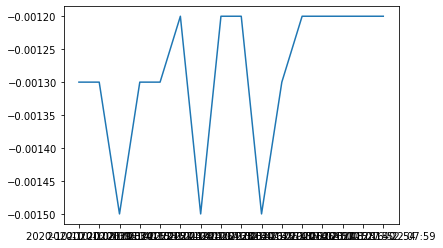

In [120]:
plt.plot(df['Realtime'][:100], df['Auxiliary channel TU1 U(V)'][:100])
plt.show()

In [131]:
from scipy.signal import butter
from scipy.signal import filtfilt
import plotly.graph_objects as go

# Filter requirements.
T = 1000  # Sample Period
fs = 35  # sample rate, Hz
cutoff = 2  # desired cutoff frequency of the filter, Hz, slightly higher than actual 1.2 Hz
nyq = 0.5 * fs  # Nyquist Frequency
order = 2  # sin wave can be approx represented as quadratic
n = int(T * fs) # total number of samples

def butter_lowpass_filter(data, cutoff, fs, order):
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients 
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

In [132]:
data = df['Auxiliary channel TU1 U(V)']
# Filter the data, and plot both the original and filtered signals.
y = butter_lowpass_filter(data, cutoff, fs, order)

In [133]:
# Plot filtered and unfiltered signal

fig = go.Figure()
fig.add_trace(go.Scatter(
            y = data,
            line =  dict(shape =  'spline' ),
            name = 'signal with noise'
            ))
fig.add_trace(go.Scatter(
            y = y,
            line =  dict(shape =  'spline' ),
            name = 'filtered signal'
            ))
fig.show()